## Business Problem
Historically, gold had been used as a form of currency in various parts of the world including the USA. In present times, precious metals like gold are held with central banks of all countries to guarantee re-payment of foreign debts, and also to control inflation which results in reflecting the financial strength of the country. Recently, emerging world economies, such as China, Russia, and India have been big buyers of gold, whereas the USA, SoUSA, South Africa, and Australia are among the big seller of gold.

Fractional change in gold price may result in huge profit or loss for investors as well as government banks.
Forecasting rise and fall in the daily gold rates can help investors to decide when to buy (or sell) the commodity. But Gold prices are dependent on many factors such as prices of other precious metals, prices of crude oil, stock exchange performance, Bonds prices, currency exchange rates, etc.


#### Business Objectives and Constraints
* To accurately predict the future adjusted closing price of Gold ETF (Exchang Traded Funds) across a given period of time in the future.
* The model should not take too long to return prediction (Latency concerns)
* To Maximize the Coefficient of determination (R2) as much as posible (the closer it is to 1 the better)
* To minimize the Root Mean Squared Error (RMSE) as much as posible (the closer it is to zero the better) 

#### Type of Machine Learning Problem
It is a Regression problem as the target variable (adjusted closing price) is a **continuous** value.

####  Performance Metric

- R^2 score (Coefficient of determination)
- RMSE (root mean squared error)

### Data Overview
- Data Source: https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset <br><br>
- Data for this study is collected from November 18th 2011 to January 1st 2019 from various sources.<br><br>
- The dataset has 1718 rows in total and 80 columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered.<br><br>
- The historical data of Gold ETF fetched from Yahoo finance has 7 columns, Date, Open, High, Low, Close, Adjusted Close, and Volume, the difference between Adjusted Close and Close is that the closing price of a stock is the price of that stock at the close of the trading day. Whereas the adjusted closing price takes into account factors such as dividends, stock splits, and new stock offerings to determine a value. So, Adjusted Close is the outcome variable which is the value you have to predict.



## Loading Data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Project Dataset.zip') #change the file path as applicable to you
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.68,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.68,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800


## Data Cleaning

## Exploratory Data Analysis

## Data Normalization

In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#Normalization
scaler = MinMaxScaler()
new_data=data.drop(columns=['Date','Close'])
normalized_df = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)
features_df = normalized_df.drop(columns=['Adj Close'])
target_df = normalized_df['Adj Close']

In [4]:
target_df

0       0.708932
1       0.748598
2       0.743674
3       0.772534
4       0.774997
          ...   
1713    0.266995
1714    0.262071
1715    0.274518
1716    0.281220
1717    0.283819
Name: Adj Close, Length: 1718, dtype: float64

## Feature Engineering

## Modelling

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.4, random_state=56)

#Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

#Ridge Regression
ridge_reg = Ridge(alpha=0.3)
ridge_reg.fit(x_train, y_train)

#Lasso Regression
lasso_reg = Lasso(alpha=0.002)
lasso_reg.fit(x_train, y_train)

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.372e-02, tolerance: 5.726e-03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.002)

In [6]:
#determining the feature weights of each model
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso-Weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_weight,Ridge_Weight,Lasso-Weight
0,GDX_High,-0.339815,-0.002934,0.000000
1,Open,-0.329196,0.248744,0.399367
2,SP_close,-0.237963,-0.013245,-0.000000
3,GDX_Low,-0.227723,0.000329,0.000000
4,PLT_High,-0.147085,-0.005140,0.000000
...,...,...,...,...
73,SP_high,0.117564,-0.013116,-0.000000
74,PLT_Price,0.157600,0.033245,0.000000
75,GDX_Close,0.473478,0.050287,0.000000
76,Low,0.624899,0.323824,0.080279


## Model Evaluation

In [7]:
models = [['Linear Reg: ',  linear_model],['Lasso: ', lasso_reg],['Ridge: ', ridge_reg]]

In [8]:
model_data = []

for name,curr_m in models:
    c_model = {}
    pred = curr_m.predict(x_test)
    c_model["Name"] = name
    
    c_model["R2"] = r2_score(y_test,pred)
    c_model['RMSE'] = np.sqrt(mean_squared_error(y_test,pred))

    model_data.append(c_model)

    

## Comparison (Tabular form)

In [10]:
fid = pd.DataFrame(model_data)
round(fid,3)

,Name,R2,RMSE
0,Linear Reg:,1.000,0.004
1,Lasso:,0.997,0.012
2,Ridge:,0.999,0.006


In [12]:
import plotly.graph_objects as go
for name,curr_m in models:
    fig = go.Figure()
    fig.update_layout(title_text=name)

    fig.add_trace(go.Scatter(x=y_test, y=y_test,
                    mode='markers',
                    name='True data'))

    fig.add_trace(go.Scatter(x=y_test, y=pred,
                    mode='markers',
                    name='predict'))


    fig.show()

<AxesSubplot:title={'center':'METRICS'}, xlabel='Name'>

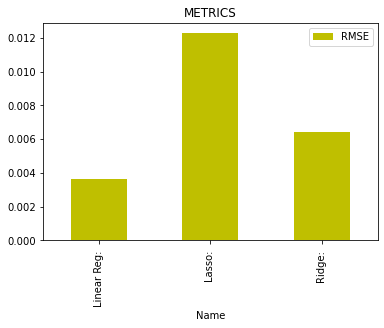

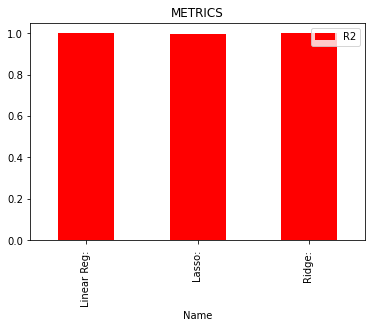

In [13]:

fid.plot(x="Name", y=['RMSE'], kind="bar" , title = 'METRICS', color='y')
fid.plot(x="Name", y=['R2'], kind="bar" , title = 'METRICS', color='r')